In [2]:
import numpy as np

A = np.array([[2, 4], [1, 3],[0,0]])


In [12]:
A

array([[2, 4],
       [1, 3],
       [0, 0]])

In [15]:
#转化为我们想要的A，将特征定为 axis=0
A = A.T
A

array([[2, 1, 0],
       [4, 3, 0]])

In [17]:
#奇异值分解
np.linalg.svd(A)

(array([[-0.40455358, -0.9145143 ],
        [-0.9145143 ,  0.40455358]]),
 array([ 5.4649857 ,  0.36596619]),
 array([[-0.81741556, -0.57604844,  0.        ],
        [-0.57604844,  0.81741556,  0.        ],
        [ 0.        ,  0.        ,  1.        ]]))

In [19]:
#U
np.linalg.eig(A.dot(A.T))

(array([  0.13393125,  29.86606875]), array([[-0.9145143 , -0.40455358],
        [ 0.40455358, -0.9145143 ]]))

In [23]:
#奇异值
np.sqrt(29.86606875),np.sqrt(0.13393125)

(5.464985704464377, 0.36596618696267558)

In [ ]:
#V的转置

In [20]:
np.linalg.eig(A.T.dot(A))

(array([ 29.86606875,   0.13393125,   0.        ]),
 array([[ 0.81741556, -0.57604844,  0.        ],
        [ 0.57604844,  0.81741556,  0.        ],
        [ 0.        ,  0.        ,  1.        ]]))

In [ ]:
#end


In [ ]:
#example2
# SVD 降维实例

In [127]:
#生成一个随机数组 A
A = np.random.randint(0,10,size=[5,9])
A

array([[6, 4, 9, 4, 2, 7, 6, 2, 6],
       [6, 3, 0, 5, 6, 2, 5, 4, 8],
       [6, 0, 4, 2, 3, 5, 4, 9, 7],
       [6, 1, 3, 6, 5, 1, 3, 7, 1],
       [4, 1, 6, 4, 2, 4, 1, 3, 6]])

In [131]:
rslt = np.linalg.svd(A)

In [ ]:
# 奇异值降维操作分解：A:m*n = (Um*r)*(Sigma r*r ) *(V r*n)的转置

In [133]:
#可以看到奇异值矩阵的前5列的和已经占到总的88.2%
#所以选择 r = 5
singular = rslt[1]
sing_part_sum = np.sum(rslt[1][:3])
sing_part_sum/np.sum(rslt[1])

0.83321737508060234

In [ ]:
#按照以上分析，列降维

In [134]:
r=3
rows = np.arange(0,r)
#近似描述的矩阵U
U = rslt[0][:,rows]
sigular = np.diag(rslt[1][:r])
VT = rslt[2][rows,:]



In [135]:
#U m*r = 10*5
np.round(U,1)

array([[-0.5,  0.7, -0.1],
       [-0.5, -0.4, -0.8],
       [-0.5, -0.2,  0.5],
       [-0.4, -0.5,  0.4],
       [-0.4,  0.3,  0.1]])

In [136]:
#singlar 5*5
np.round(sigular,1)

array([[ 29.4,   0. ,   0. ],
       [  0. ,   9.2,   0. ],
       [  0. ,   0. ,   6.3]])

In [137]:
#VT 5*10
np.round(VT,1)

array([[-0.4, -0.1, -0.3, -0.3, -0.3, -0.3, -0.3, -0.4, -0.4],
       [-0.1,  0.1,  0.6, -0.2, -0.4,  0.4,  0. , -0.5,  0.1],
       [ 0. , -0.4,  0.4, -0.1, -0.2,  0.1, -0.2,  0.6, -0.4]])

In [138]:
#压缩后的矩阵就是 U*singular
Aapp = U.dot(sigular)
Aapp = np.round(Aapp,1)
Aapp

array([[-15.3,   6.3,  -0.8],
       [-13.2,  -3.9,  -4.9],
       [-14.5,  -1.4,   2.9],
       [-11.2,  -4.6,   2.5],
       [-10.9,   2.6,   0.6]])

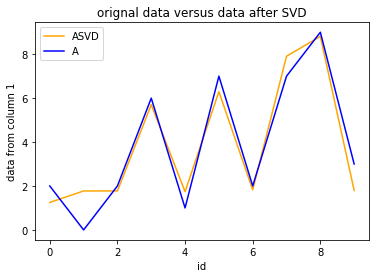

In [114]:
import matplotlib.pyplot as plt
plt.plot(ASVD[:,1],'orange',label='ASVD')
plt.plot(A[:,1],'blue',label='A')
plt.legend()
plt.title('orignal data versus data after SVD')
plt.xlabel('id')
plt.ylabel('data from column 1')
plt.show()